# Overview

In this project we will reivew the historical data on game sales from various platforms. 

First, we will prepare the data and fix any necessary changes to create an accurate data base. This includes, replacing the columns names to lower case, convert data to the required types, fix missing and/or duplicated values, and lastly calculating the total sales for each game. 

Second, we will analyze the data through various EDA concepts and create visuals of our data that will help us draw conclusions later on. 

Next, we will test the hpothesis of average user ratings from platforms and game genres. 

Lastly, we will draw conclusions of our analysis and hypotheiss testing. 

# Initialization

In [1]:
#Loading all the libraries.

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

from scipy.stats import ttest_ind

# Loading Data

In [2]:
games = pd.read_csv('/datasets/games.csv')

# Preparing Data

In [3]:
#Replace column names to lower case.

games.columns = games.columns.str.lower()

print(games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

##### Fixing Data Types

In [4]:
#Show the data types of each column

games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Check for missing data.

print(games.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         name  platform  year_of_release  genre  na_sales  eu_sales  jp_sales  \
0      False     False            False  False     False     False     False   
1      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
4      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16710  False     False            False  False     False     False     False   
16711  False     False            False  False     False     False     False   
16712  False     False            False  False     False     False     False   
16713  False     False            False  False     False     False     False   
16714  False     False            False  False     False  

##### Fixing Column Data: critic_score

In the critic_score we filled the missing values with the median of the entire column. The median is a be better choice becuase it has less influenced by extreme values.


In [6]:
# Count missing values before imputation
missing_values_before = games['critic_score'].isnull().sum()

# Fill missing values in 'critic_score' with the mean of the column
games['critic_score'].fillna(games['critic_score'].mean(), inplace=True)

#Count missing values after imputation
missing_values_after = games['critic_score'].isnull().sum()

#Check if all missing values were handled
if missing_values_after == 0:
    print(f"Missing values imputed successfully. {missing_values_before} values were filled.")
else:
    print(f"Some missing values remain. Initially: {missing_values_before}, Remaining: {missing_values_after}.")

Missing values imputed successfully. 8578 values were filled.


##### Fixing Column Data: user_score

The data type in the column, "user_score" was change from object to float64.

The column had a mix of numerical and categorical data. We had to replace the "tbd" that was found in the column to "NaN". 
From there we were able to switch the data type to float64.

##### Missing data explanation:

In the user_score we filled the missing values with the median of the entire column. The median is a be better choice becuase it may has less influenced by extreme values.

In [7]:
# Replace 'tbd' with NaN in user_score column.

games['user_score'] = games['user_score'].replace('tbd', np.NaN)

# Convert column to float

games['user_score'] = games['user_score'].astype(float)


In [8]:
#Count missing values before deletion

user_values = games['user_score'].isnull().sum()

#Drop rows with missing values in the 'user_score' column

games.dropna(subset=['user_score'], inplace=True)

#Count missing values after deletion

user_values = games['user_score'].isnull().sum()

# Check if all missing values were removed

if user_values== 0:
    
    print("All rows with missing values were removed.")
    
else:
    
    print(f"Remaining missing values decreased from {initial_missing} to {final_missing}.")


All rows with missing values were removed.


##### Fixing Column Data: rating

In the rating column, we filled the missing data with "Unknown" value placeholder. We used "Unknwon" beacause the data type is categorical and there wasnt any further informaiton to provide for the missing game rating.  

In [9]:
#Fill missing values with "Unknown". 

games['rating'].fillna("Unknown", inplace=True)

##### Final check for missing data in columns.

In [10]:
#Checking for missing data.

print(games.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of         name  platform  year_of_release  genre  na_sales  eu_sales  jp_sales  \
0      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
6      False     False            False  False     False     False     False   
7      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16681  False     False            False  False     False     False     False   
16692  False     False            False  False     False     False     False   
16696  False     False            False  False     False     False     False   
16702  False     False            False  False     False     False     False   
16705  False     False            False  False     False  

##### Total sales for each game

In [11]:
#Calculate total sales per game across the three columns.

games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)

#Display the DataFrame with Total Sales.

print(games)

                                    name platform  year_of_release      genre  \
0                             Wii Sports      Wii           2006.0     Sports   
2                         Mario Kart Wii      Wii           2008.0     Racing   
3                      Wii Sports Resort      Wii           2009.0     Sports   
6                  New Super Mario Bros.       DS           2006.0   Platform   
7                               Wii Play      Wii           2006.0       Misc   
...                                  ...      ...              ...        ...   
16681                            Worms 2       PC           1997.0   Strategy   
16692  Metal Gear Solid V: Ground Zeroes       PC           2014.0     Action   
16696                             Breach       PC           2011.0    Shooter   
16702            STORM: Frontline Nation       PC           2011.0   Strategy   
16705                            15 Days       PC           2009.0  Adventure   

       na_sales  eu_sales  

##### Checking for duplicates:

In [12]:
# Check for duplicates in the entire DataFrame

duplicates = games.duplicated()

# Count the number of duplicate rows

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


##### Conclusion: 

After assessing the data, we were able to delete any missing values in the data set and replace any incorrect values in object data types. In addition, we were able to calcualte the total sales for each game and double check to make sure data values were not missing. Next we will further analyze the data set to have a deeper look into the sales generated.

# Analyze Data

In [13]:
#The number of games released for each year. 

games_per_year = games.groupby('year_of_release')['name'].count().reset_index()

# Rename columns for clarity

games_per_year.columns = ['release_year', 'number_of_games']

# Display the result

print(games_per_year)

    release_year  number_of_games
0         1985.0                1
1         1988.0                1
2         1992.0                1
3         1994.0                1
4         1996.0                8
5         1997.0               18
6         1998.0               31
7         1999.0               31
8         2000.0              107
9         2001.0              257
10        2002.0              464
11        2003.0              516
12        2004.0              489
13        2005.0              583
14        2006.0              552
15        2007.0              629
16        2008.0              661
17        2009.0              614
18        2010.0              467
19        2011.0              501
20        2012.0              339
21        2013.0              304
22        2014.0              329
23        2015.0              297
24        2016.0              262


##### Bar Chart for games released each year.

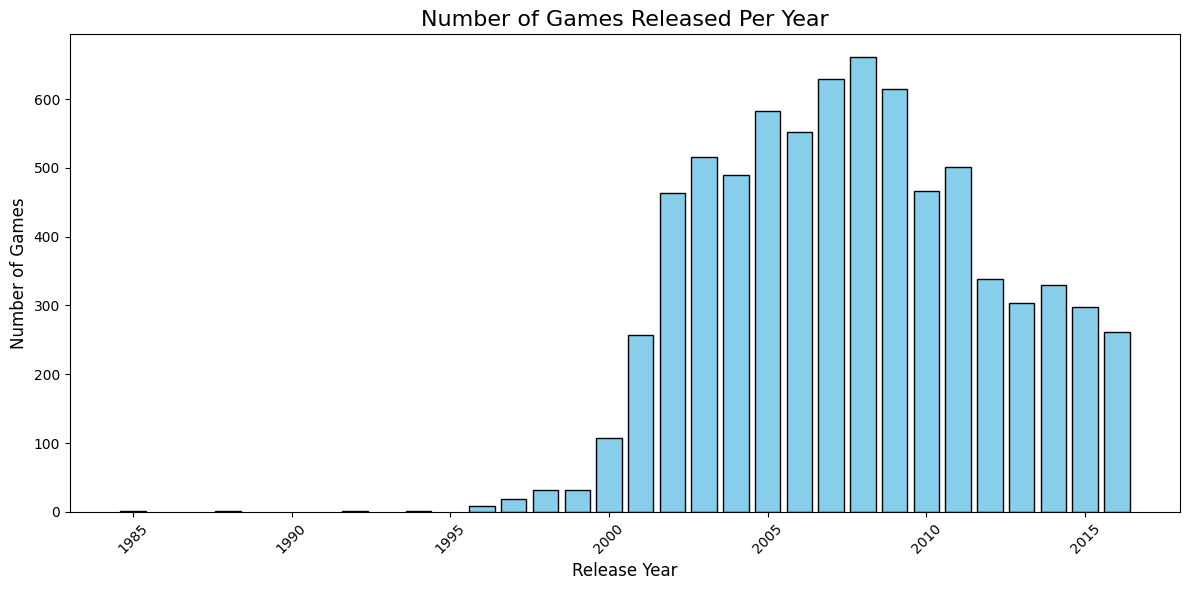

In [14]:
#Create the bar chart

plt.figure(figsize=(12, 6)) 

plt.bar(games_per_year['release_year'], games_per_year['number_of_games'], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Number of Games Released Per Year', fontsize=16)

plt.xlabel('Release Year', fontsize=12)

plt.ylabel('Number of Games', fontsize=12)

# Rotate x-axis labels for better readability

plt.xticks(rotation=45)

# Display the chart

plt.tight_layout()

plt.show()

Above we have a table that shows the year and the number of games released for that year. Year after year we can see the numer of games released increase exponentially. This may be due to the dot com in the early two thousands and the release of newer technology. 

##### Total sales per platform

In [15]:
#Calculate total sales per platform

total_sales_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort by total sales in ascending order

total_sales_per_platform = total_sales_per_platform.sort_values(by='total_sales', ascending=True)

# Display the platforms with greatest total sales

print(total_sales_per_platform)

   platform  total_sales
1        DC         4.49
11      PSV        29.41
13     WiiU        62.32
0       3DS       119.35
16     XOne       122.24
3       GBA       134.89
4        GC       157.51
10      PSP       164.80
5        PC       187.12
6        PS       203.78
9       PS4       206.89
15       XB       210.43
2        DS       381.49
12      Wii       645.88
8       PS3       714.49
14     X360       819.21
7       PS2       843.59


##### Sales distribution per year.

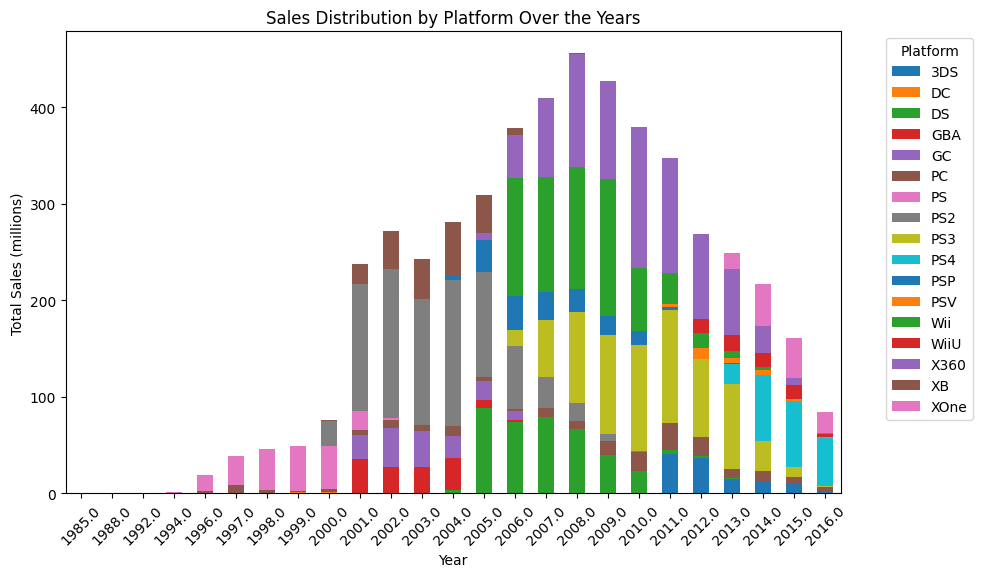

In [16]:
#Group by 'Release_Year' and 'Platform' to get total sales for each platform per year

sales_by_year_platform = games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

#Plot the sales distribution by year

sales_by_year_platform.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Sales Distribution by Platform Over the Years')

plt.xlabel('Year')

plt.ylabel('Total Sales (millions)')

plt.xticks(rotation=45)

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

##### Platforms with zero sales

In [17]:
#Get platforms that have zero sales in the most recent year

latest_year = games['year_of_release'].max()

platforms_with_zero_sales = sales_by_year_platform.loc[latest_year]

#Find platforms that have zero sales in the latest year

zero_sales_platforms = platforms_with_zero_sales[platforms_with_zero_sales == 0].index.tolist()

#Print platforms that had zero sales in the latest year

print("Platforms with zero sales in the latest year:", zero_sales_platforms)

Platforms with zero sales in the latest year: []


##### Platform lifespan.

In [18]:
#Find the first and last year of sales for each platform

platform_lifespans = games.groupby('platform')['year_of_release'].agg(['min', 'max'])

#Calculate the duration of each platform's lifespan

platform_lifespans['Lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

#Average lifespan 

print(platform_lifespans[['min', 'max', 'Lifespan']])

             min     max  Lifespan
platform                          
3DS       2011.0  2016.0       5.0
DC        1999.0  2001.0       2.0
DS        2004.0  2013.0       9.0
GBA       2001.0  2006.0       5.0
GC        2001.0  2007.0       6.0
PC        1985.0  2016.0      31.0
PS        1994.0  2002.0       8.0
PS2       2000.0  2011.0      11.0
PS3       2006.0  2016.0      10.0
PS4       2013.0  2016.0       3.0
PSP       2004.0  2013.0       9.0
PSV       2011.0  2016.0       5.0
Wii       2006.0  2014.0       8.0
WiiU      2012.0  2016.0       4.0
X360      2005.0  2016.0      11.0
XB        2000.0  2008.0       8.0
XOne      2013.0  2016.0       3.0


##### Filtering data from 2013 and later

In [19]:
#Filtered the DataFrame to include only data from the year 2013 and later

games_filtered = games[games['year_of_release'] >= 2013]

##### Platforms leading in sales from 2013 and later.

In [20]:
#Calculate total sales per platform from 2013 and later

platform_sales_filtered = games_filtered.groupby('platform')['total_sales'].sum().reset_index()

#Sort by total sales in descending order

platform_sales_filtered = platform_sales_filtered.sort_values(by='total_sales', ascending=True)

#Display the platforms leading in sales (from 2000 onwards)

print("Sales in the Millions")

print("Platforms leading in sales (2013 and later):\n", platform_sales_filtered)

Sales in the Millions
Platforms leading in sales (2013 and later):
    platform  total_sales
5       PSP         0.30
1        DS         0.35
7       Wii         9.65
6       PSV        14.84
2        PC        32.37
0       3DS        40.82
8      WiiU        48.54
9      X360       105.91
10     XOne       122.24
3       PS3       128.80
4       PS4       206.89


##### Growing and shrinking platforms from 2013 and later: 

In [21]:
#Group by platform and release year to get total sales per platform per year (2013 and later)

sales_by_year_platform = games_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

#Display the total sales by platform per year

print("Sales by Platform per Year:\n", sales_by_year_platform)

Sales by Platform per Year:
 platform           3DS    DS     PC    PS3    PS4  PSP   PSV   Wii   WiiU  \
year_of_release                                                             
2013.0           15.35  0.35   9.98  87.30  21.36  0.3  5.40  7.29  16.43   
2014.0           12.72   NaN  10.98  30.56  68.14  NaN  5.76  2.36  14.78   
2015.0           10.54   NaN   6.86   9.54  68.53  NaN  2.65   NaN  14.30   
2016.0            2.21   NaN   4.55   1.40  48.86  NaN  1.03   NaN   3.03   

platform          X360   XOne  
year_of_release                
2013.0           68.77  16.81  
2014.0           28.51  42.91  
2015.0            7.54  40.73  
2016.0            1.09  21.79  


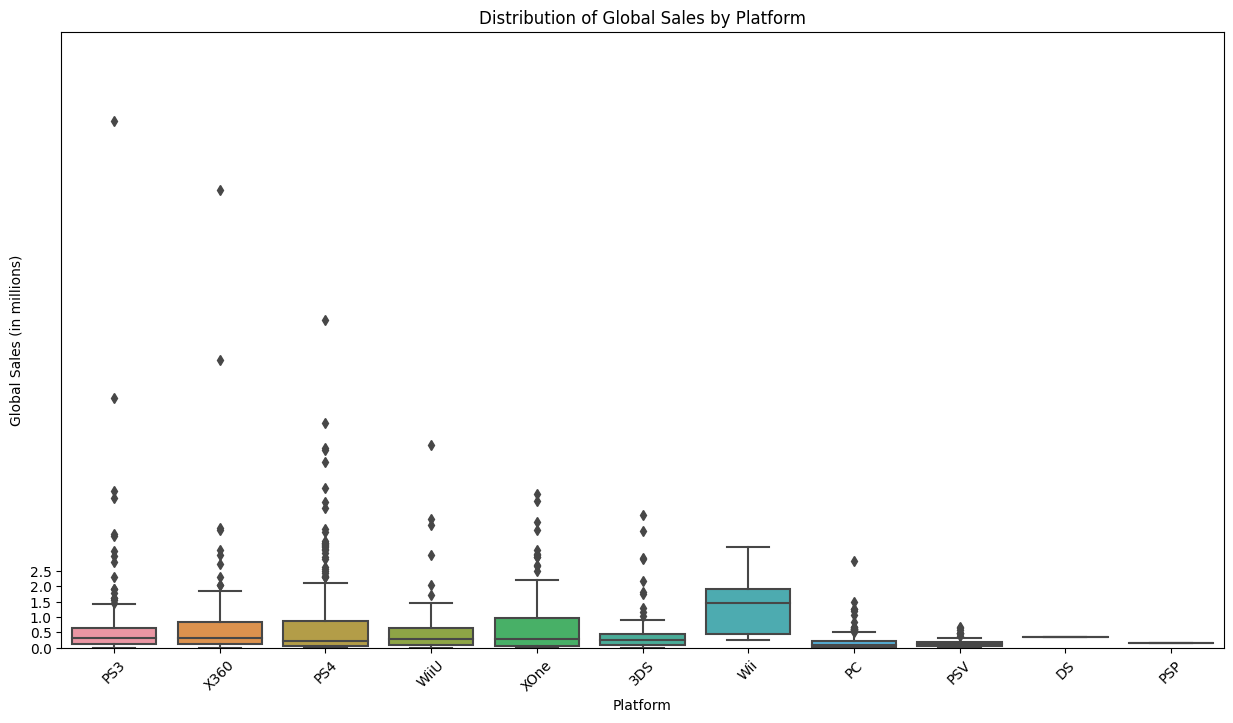

In [22]:
#Filter data for years >= 2013

games_filtered = games[games['year_of_release'] >= 2013]

#Set the size of the plot

plt.figure(figsize=(15, 8))

#Create a box plot for global sales by platform

sns.boxplot(x='platform', y='total_sales', data=games_filtered)

#Set plot title and labels

plt.title('Distribution of Global Sales by Platform')

plt.xlabel('Platform')

plt.ylabel('Global Sales (in millions)')

plt.ylim(0, 20)

# Set y-axis ticks in increments of 0.5

y_ticks = np.arange(0, 3, 0.5)  # Adjust the range as needed

plt.yticks(y_ticks)

#Show the plot

plt.xticks(rotation=45)

plt.show()

There is a significant differnece in sales from in the first ten platforms listed on the x-axis compared to the last ten. The global sales drops off from 20 million to 10 million from the start of "PSP" platform on the x-axis to the end at "WS". 

##### Average sales on platforms from 2013 to later.

In [23]:
#Filter the DataFrame to include only data from the year 2013 and later

games_filtered = games[games['year_of_release'] >= 2013]

#Calculate the average sales per platform from 2013 and later

average_sales_per_platform = games_filtered.groupby('platform')['total_sales'].mean().reset_index()

#Rename columns for clarity

average_sales_per_platform.columns = ['platform', 'average_sales']

#Display the result

print("Average sales per platform (2000 and later):\n", average_sales_per_platform)

Average sales per platform (2000 and later):
    platform  average_sales
0       3DS       0.510250
1        DS       0.350000
2        PC       0.208839
3       PS3       0.692473
4       PS4       0.805019
5       PSP       0.150000
6       PSV       0.149899
7       Wii       1.378571
8      WiiU       0.606750
9      X360       0.740629
10     XOne       0.671648


##### Impact of reviews and sales. 

In [24]:
#The mean and median total sales for each genre

genre_sales_Wii = games.groupby('genre')['total_sales'].agg(['mean', 'median']).reset_index()

#Genres by median sales

genre_sales_Wii = genre_sales_Wii.sort_values(by='median', ascending=False)

print(genre_sales_Wii)

           genre      mean  median
10        Sports  0.734714   0.330
3           Misc  0.909157   0.310
4       Platform  0.827150   0.310
2       Fighting  0.574536   0.300
8        Shooter  0.815346   0.280
9     Simulation  0.588750   0.255
0         Action  0.616306   0.250
6         Racing  0.672278   0.230
7   Role-Playing  0.629300   0.230
5         Puzzle  0.576562   0.130
1      Adventure  0.288967   0.120
11      Strategy  0.232733   0.080


           genre  user_score_corr  critic_score_corr
0         Action         0.228781           0.444851
1      Adventure         0.025642           0.338966
2       Fighting         0.291154           0.425829
3           Misc         0.111463           0.034977
4       Platform         0.274071           0.429413
5         Puzzle         0.155304           0.376845
6         Racing         0.217376           0.271131
7   Role-Playing         0.133468           0.289281
8        Shooter         0.062557           0.309658
9     Simulation        -0.020159           0.120848
10        Sports         0.128866           0.158559
11      Strategy         0.341417           0.594750


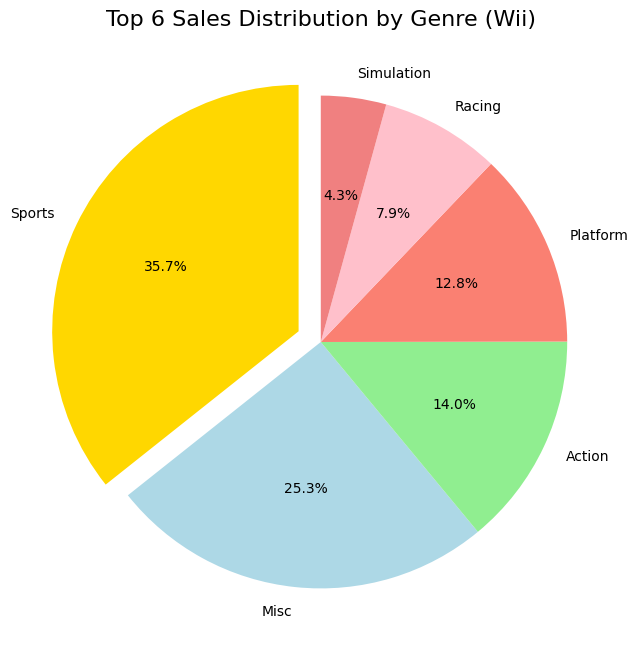

In [25]:
#Group data by genre and calculate total sales for each genre

games_Wii = games[games['platform'] == 'Wii']

genre_sales_Wii_total = games_Wii.groupby('genre')['total_sales'].sum().reset_index()

#Sort genres by total sales in descending order and keep the top 6

top_6_genres = genre_sales_Wii_total.sort_values(by='total_sales', ascending=False).head(6)

#Pie chart for the top 6 genres

plt.figure(figsize=(8, 8))

plt.pie(top_6_genres['total_sales'], labels=top_6_genres['genre'], autopct='%1.1f%%', 
        
        colors=['gold', 'lightblue', 'lightgreen', 'salmon', 'pink', 'lightcoral'], 
        
        startangle=90, explode=[0.1 if i == 0 else 0 for i in range(len(top_6_genres))])

plt.title('Top 6 Sales Distribution by Genre (Wii)', fontsize=16)

#Group data by genre and calculate the correlation for each genre

genre_correlations = games_Wii.groupby('genre').apply(
    
    lambda x: pd.Series({
        
        'user_score_corr': x['user_score'].corr(x['total_sales']),
        
        'critic_score_corr': x['critic_score'].corr(x['total_sales'])
    })
).reset_index()

# Display the correlation results for each genre

print(genre_correlations)

# Display the chart

plt.show()

##### Creating user profile for the following groups: NA, EU, JP

In [26]:
#Aggregate sales by platform for each region

platform_sales_by_region = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#Calculate market shares for each region

platform_sales_by_region['NA_Market_Share'] = (
    platform_sales_by_region['na_sales'] / platform_sales_by_region['na_sales'].sum() * 100
)
platform_sales_by_region['EU_Market_Share'] = (
    platform_sales_by_region['eu_sales'] / platform_sales_by_region['eu_sales'].sum() * 100
)
platform_sales_by_region['JP_Market_Share'] = (
    platform_sales_by_region['jp_sales'] / platform_sales_by_region['jp_sales'].sum() * 100
)

#Find the top 5 platforms in each region

top_5_na = platform_sales_by_region.sort_values('na_sales', ascending=False).head(5)

top_5_eu = platform_sales_by_region.sort_values('eu_sales', ascending=False).head(5)

top_5_jp = platform_sales_by_region.sort_values('jp_sales', ascending=False).head(5)

#Results

print("Top 5 Platforms in North America:\n", top_5_na[['na_sales', 'NA_Market_Share']])

print("\nTop 5 Platforms in Europe:\n", top_5_eu[['eu_sales', 'EU_Market_Share']])

print("\nTop 5 Platforms in Japan:\n", top_5_jp[['jp_sales', 'JP_Market_Share']])

#Aggregate total sales by genre

genre_sales = games.groupby('genre')[['total_sales', 'na_sales', 'eu_sales', 'jp_sales']].sum()

#Sort genres by global sales and find the top five

top_5_genres = genre_sales.sort_values('total_sales', ascending=False).head(5)

# Display the results

print("Top 5 Genres Globally:\n", top_5_genres)

# Optional: Add percentage of total sales for each genre

genre_sales['total_sales'] = (
    genre_sales['total_sales'] / genre_sales['total_sales'].sum() * 100
)

# Display top 5 genres with market share

print("\nTop 5 Genres with Global Market Share:\n", 
      top_5_genres.assign(Global_Sales_Share=top_5_genres['total_sales']))

Top 5 Platforms in North America:
           na_sales  NA_Market_Share
platform                           
X360        561.75        19.693666
PS2         496.02        17.389323
Wii         377.24        13.225169
PS3         361.72        12.681073
DS          192.91         6.762982

Top 5 Platforms in Europe:
           eu_sales  EU_Market_Share
platform                           
PS3         293.40        17.188653
PS2         269.96        15.815436
X360        247.26        14.485571
Wii         215.88        12.647193
PC          114.94         6.733687

Top 5 Platforms in Japan:
           jp_sales  JP_Market_Share
platform                           
DS           83.67        18.655102
PS2          77.61        17.303962
PS3          59.37        13.237163
Wii          52.76        11.763394
PS           40.53         9.036588
Top 5 Genres Globally:
               total_sales  na_sales  eu_sales  jp_sales
genre                                                  
Action          

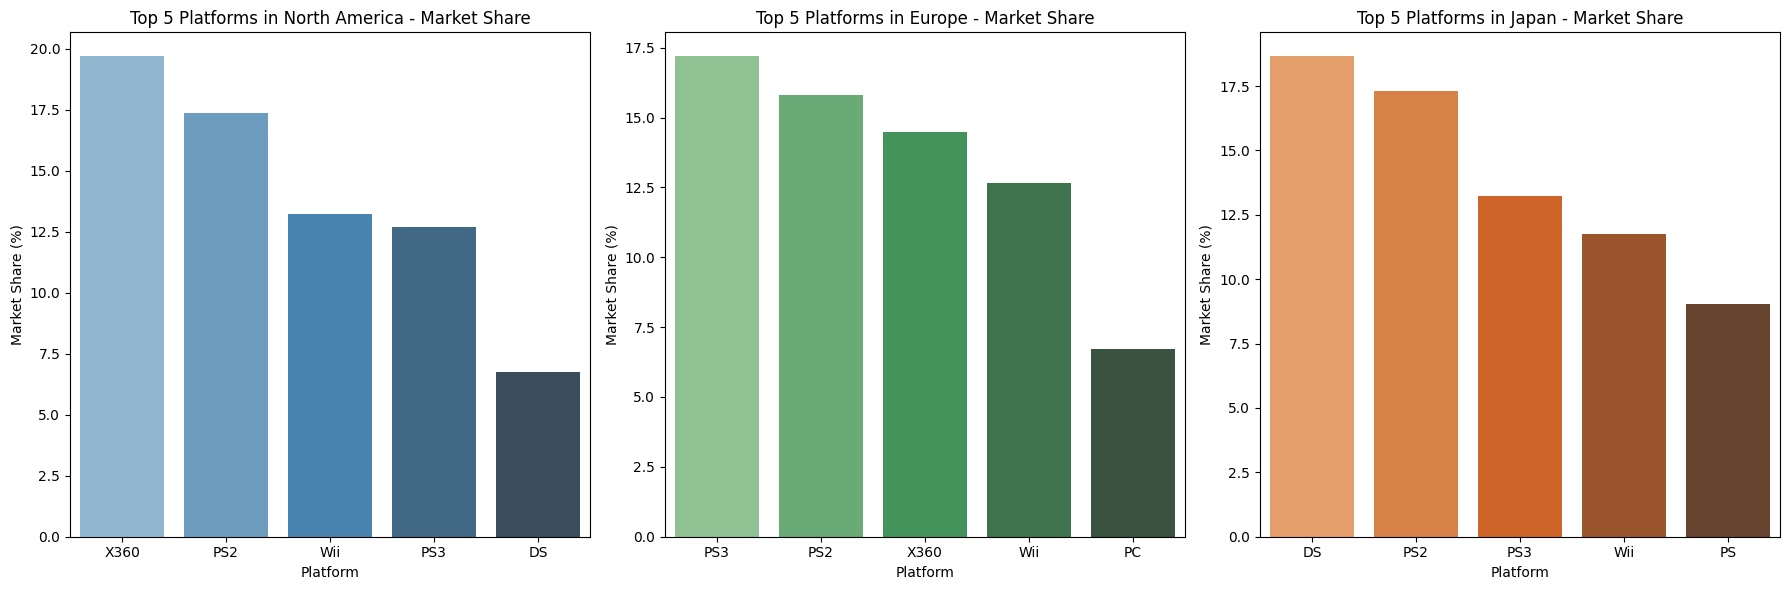

In [27]:
#Set the figure size for the bar charts

plt.figure(figsize=(18, 6))

#Bar chart for NA Market Share (North America)

plt.subplot(1, 3, 1)

sns.barplot(x=top_5_na.index, y=top_5_na['NA_Market_Share'], palette='Blues_d')

plt.title('Top 5 Platforms in North America - Market Share')

plt.xlabel('Platform')

plt.ylabel('Market Share (%)')

# Bar chart for EU Market Share (Europe)

plt.subplot(1, 3, 2)

sns.barplot(x=top_5_eu.index, y=top_5_eu['EU_Market_Share'], palette='Greens_d')

plt.title('Top 5 Platforms in Europe - Market Share')

plt.xlabel('Platform')

plt.ylabel('Market Share (%)')

# Bar chart for JP Market Share (Japan)

plt.subplot(1, 3, 3)

sns.barplot(x=top_5_jp.index, y=top_5_jp['JP_Market_Share'], palette='Oranges_d')

plt.title('Top 5 Platforms in Japan - Market Share')

plt.xlabel('Platform')

plt.ylabel('Market Share (%)')

# Adjust layout and display

plt.tight_layout()

plt.show()

##### Testing the hypothesis.

#### Average User Ratings for Xbox One and PC

###### Null Hypothesis:

The average user ratings for Xbox One and PC platforms are the same.

- We assume that there’s no significant difference unless the data provides strong evidence otherwise.

###### Alternative Hypothesis: 

The average user ratings for Xbox One and PC platforms are different.

- Rejecting the null suggests that platform choice impacts user satisfaction.

In [28]:
#Filter data for Xbox One and PC platforms

XOne_ratings = games[games['platform'] == 'XOne']['user_score'].dropna()

PC_ratings = games[games['platform'] == 'PC']['user_score'].dropna()

# Perform the t-test

t_stat, p_value = ttest_ind(XOne_ratings, PC_ratings, equal_var=False)

# Print the results

print("T-test Results:")

print(f"T-statistic: {t_stat}")

print(f"P-value: {p_value}")

T-test Results:
T-statistic: -4.653422798410771
P-value: 4.935072360183574e-06


Based on the p-value being significantly smaller than 0.05, we reject the null hypothesis.

This means there is a statistically significant difference between the average user ratings for Xbox One and PC.

#####  Average User Ratings for Action and Sports Genres

###### Null Hypothesis: 

The average user ratings for Action and Sports genres are the same.

- We assume there is no difference between the two groups unless the data provides strong evidence otherwise.

###### Alternative Hypothesis: 

The average user ratings for Action and Sports genres are different

- If we reject the null means there is significant evidence that the ratings for these genres differ.

In [29]:
# Filter data for 'Action' and 'Sports' genres

action_ratings = games[games['genre'] == 'Action']['user_score'].dropna()

sports_ratings = games[games['genre'] == 'Sports']['user_score'].dropna()

#Perform the t-test

t_stat, p_value = ttest_ind(action_ratings, sports_ratings, equal_var=False)

#Print the results

print("T-test Results:")

print(f"T-statistic: {t_stat}")

print(f"P-value: {p_value}")

T-test Results:
T-statistic: 1.57746791633354
P-value: 0.11483818791498286


Based on the p-value being much greater than 0.05, there is no statistically significant difference between the average user ratings for the Action and Sports genres.

We fail to reject the null hypothesis, which means the average ratings for Action and Sports genres are statistically similar.

### Final Observations

Based on the project objectives we were able to accomplish the following: 
    
1. Prepare the data:

- We were able to make the correct changes to create an accurate data base. 

- Fix any missing values with explanations as to why they are missing. 

- Calculate the total sales for each game. 

- Checked for dupicate data values. 

2. Analyze the data: 

- We took a deep dive into the platforms and found which ones had the greatest sales. 

- Built box plots to visually display the data and give a detailed insight about our analysis. 

- We also saw trends of how reviews affected the sales of of a popular platform. 

- Added pie charts to visually show the trend betwen genres for the Wii gaming platform. 

3. Created a profile for the three regions (NA, EU, JP): 

- Calculated the top five platforms for each region. 

- Calculated the top five genres for each region. 

- Added three bar charts that visually showed the data values. 

4. Hypothesis Testing:

- Tested a hypothesis for the relaitonship between the average user ratings of the Xbox One and PC platforms are the same. 

- Tested the hypothesis for the relationship between the average user ratings for the Action and Sports genres are different.
        
This report is beneficial for anyone who is in the gaming industry and wants to udnerstand more about the global sales of a variety of games. In addition, the report will give a insight on the different gaming genres and the trends the vary from different gaming platforms year over year. 